# Summary
I ran a pearson correlation to examine the relationship between gray matter volume and a measure of fluid intelligence, the Penn Progressive Matrices. Results were significant, r = 0.32, p < 0.001. Effect size interpretations vary, but based on the convention of small (0.1), medium (0.3), and large (0.5), a correlation of 0.32 would be considered medium.

$r^2$ was found to be 0.10, meaning that 10% of the variability in the task could be explained by gray matter volume, and vice-versa.

# Data Explanation
The Human Connectome Project's *behavioral* dataset includes demographic information, performance on various tasks, and measures of brain structure/function for 1206 adults (ages 22+). The neuroimaging dataset includes four imaging modalities: structural images (T1w and T2w), resting-state fMRI (rfMRI), task-fMRI (tfMRI), and high angular resolution diffusion imaging (dMRI). These files can be quite large (tens of GB).

The data is open-access. The reference manual can be found [here](https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf) and the data can be found [here](http://db.humanconnectome.org/) if you're interested. You will need to register an account to access the data, but that process should be straightforward.

# Replication Notes
I downloaded the data on my google drive [here](https://drive.google.com/file/d/1-F5s908KDLcbfDlN1BYOBWKhe1E4tqWC/view?usp=sharing ), so to replicate the results of this notebook, you can simply follow that link and download the `HCP-behavioral.csv` file to your own Google Drive. 

Just make sure that when you're reading the file `data = pd.read_csv('/content/gdrive/MyDrive/Data/HCP-behavioral.csv')`, the path is correct. As you can see, I put my file in a folder called `Data`, but you can put yours wherever, as long as the path argument for the `read_csv()` function is specific to the location of your version of `HCP-behavioral.csv`.

# Imports, Mounts, and Reading Data

In [1]:
import google.colab.drive as drive
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/Data/HCP-behavioral.csv')

# Data Subsetting and Cleaning

In [4]:
data.Age.value_counts()

26-30    527
31-35    418
22-25    247
36+       14
Name: Age, dtype: int64

HCP dataset has four age groups. I will go with 26-30. It is the highest, and at that age there should be less variability (finished developing but hasn't started age-related atrophy).

In [5]:
data_high20s = data[data['Age']=='26-30']
data_high20s_subset = data_high20s[['FS_Total_GM_Vol','PMAT24_A_CR']]
data_high20s_subset.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Correlation Analysis and Results

In [6]:
# Running the correlation
X = data_high20s_subset['FS_Total_GM_Vol'] 
Y = data_high20s_subset['PMAT24_A_CR']
corr = stats.pearsonr(X, Y)

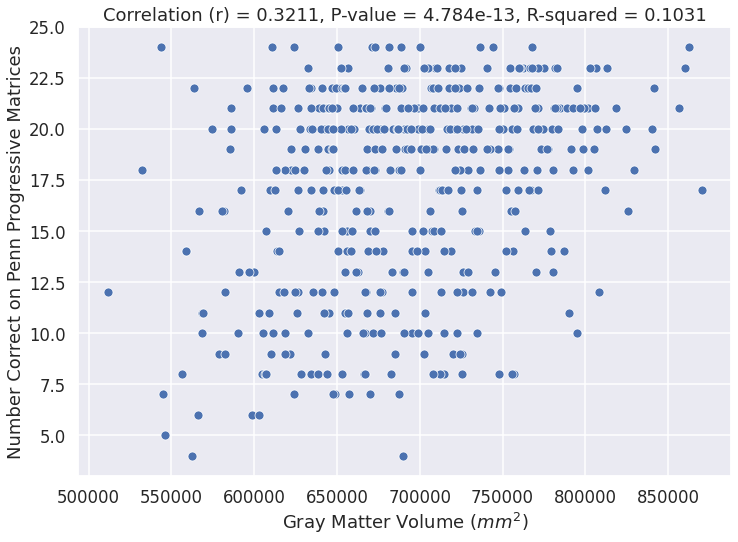

In [7]:
# Visualizing the results
sns.set_theme(context='talk', rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x=X, y=Y)
plt.xlabel('Gray Matter Volume ($mm^2$)', fontsize=18)
plt.ylabel('Number Correct on Penn Progressive Matrices', fontsize=18)
plt.title(f'Correlation (r) = {corr[0]:.4g}, P-value = {corr[1]:.4g}, R-squared = {corr[0]**2:.4g}')
plt.show()